In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import timedelta
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
def repair_dates(df):
    df['date_range_start'] = pd.to_datetime(df['date_range_start'], utc=True)
    df['date_range_start'] = df['date_range_start'].dt.tz_convert('US/Eastern')

In [3]:
def test(df, metric, attr, class1, class2):
    """Returns the results of two-sample T-Test and K-S test on the given
    dataframes for the given attribute."""
    df1 = df[df[attr] == class1]
    df2 = df[df[attr] == class2]
    t_results = stats.ttest_ind(df1[metric].dropna(), df2[metric].dropna())
    ks_results = stats.ks_2samp(df1[metric].dropna(), df2[metric].dropna())
    return [t_results.pvalue, ks_results.pvalue]

In [4]:
cdi_total_df = pd.read_csv('./exports/cdi/total_all.csv')
repair_dates(cdi_total_df)
cdi_total_df['week'] = cdi_total_df['date_range_start'].dt.week

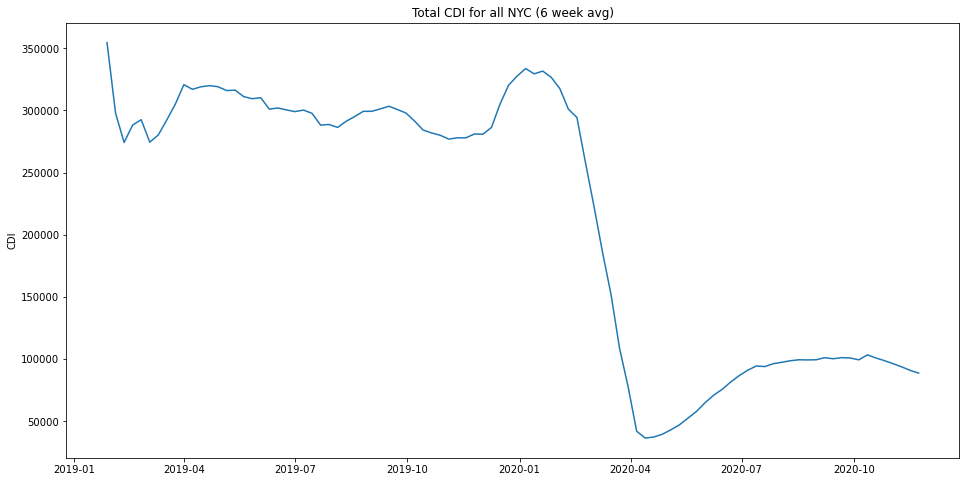

In [5]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(cdi_total_df['date_range_start'], cdi_total_df['cdi'])
ax.set_title('Total CDI for all NYC (6 week avg)')
ax.set_ylabel('CDI')
plt.show()

In [6]:
cdi_total_df['date_range_end'] = cdi_total_df['date_range_start'] + timedelta(days=7)
cdi_total_df['year'] = cdi_total_df['date_range_end'].dt.year

In [7]:
test(cdi_total_df, 'cdi', 'year', 2019, 2020)

[1.1019681708335518e-20, 4.121200791049135e-17]

We can reject the hypothesis that CDI from 2019 and 2020 follow the same distribution.

In [8]:
cdi_cluster_df = pd.read_csv('./exports/cdi/total_by_cluster.csv')
repair_dates(cdi_cluster_df)
cdi_cluster_df = cdi_cluster_df[cdi_cluster_df['date_range_start'].dt.year == 2020]

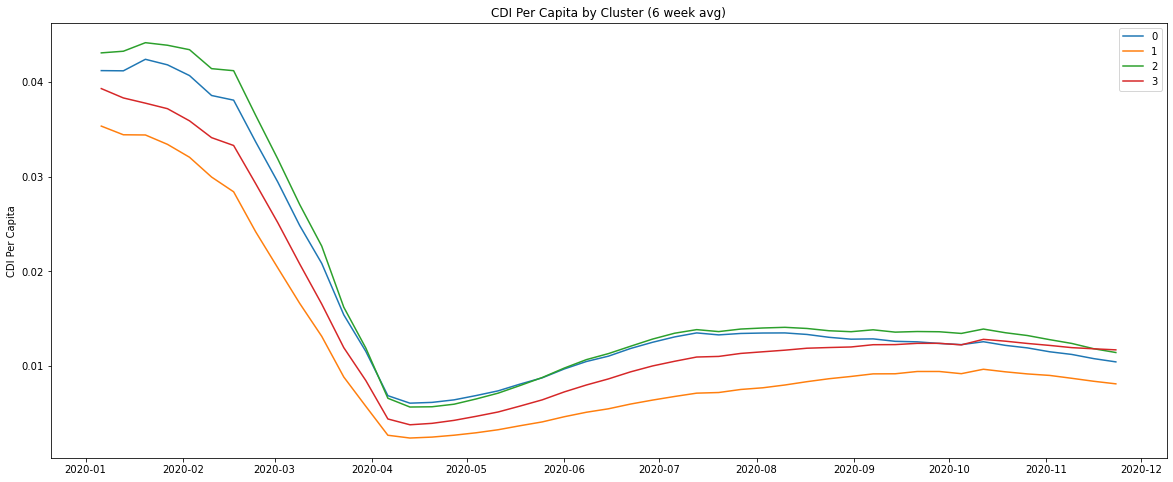

In [9]:
fig, ax = plt.subplots(figsize=(20, 8))
for key, group in cdi_cluster_df.groupby(by=['cluster']):
    ax.plot(group['date_range_start'], group['cdi_per_capita'], label=key)
ax.set_title('CDI Per Capita by Cluster (6 week avg)')
ax.set_ylabel('CDI Per Capita')
ax.legend()
plt.show()

In [10]:
print(0, 1, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 0, 1))
print(0, 2, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 0, 2))
print(0, 3, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 0, 3))
print(1, 2, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 1, 2))
print(1, 3, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 1, 3))
print(2, 3, test(cdi_cluster_df, 'cdi_per_capita', 'cluster', 2, 3))

0 1 [0.017956179169930343, 4.432602140498285e-08]
0 2 [0.6963447438599593, 0.03035107595148269]
0 3 [0.36748212915738, 0.054452894761163696]
1 2 [0.00759805017926164, 4.432602140498285e-08]
1 3 [0.12378169412608649, 1.799924926070363e-05]
2 3 [0.20449947851037223, 0.0008060279194562179]


We can reject the hypothesis that cluster 0 and 1 follow the same distribution.\
We can reject the hypothesis that cluster 1 and 2 follow the same distribution.

In [11]:
cdi_cluster_diff_df = pd.read_csv('./exports/cdi/diff_by_cluster.csv')
repair_dates(cdi_cluster_diff_df)

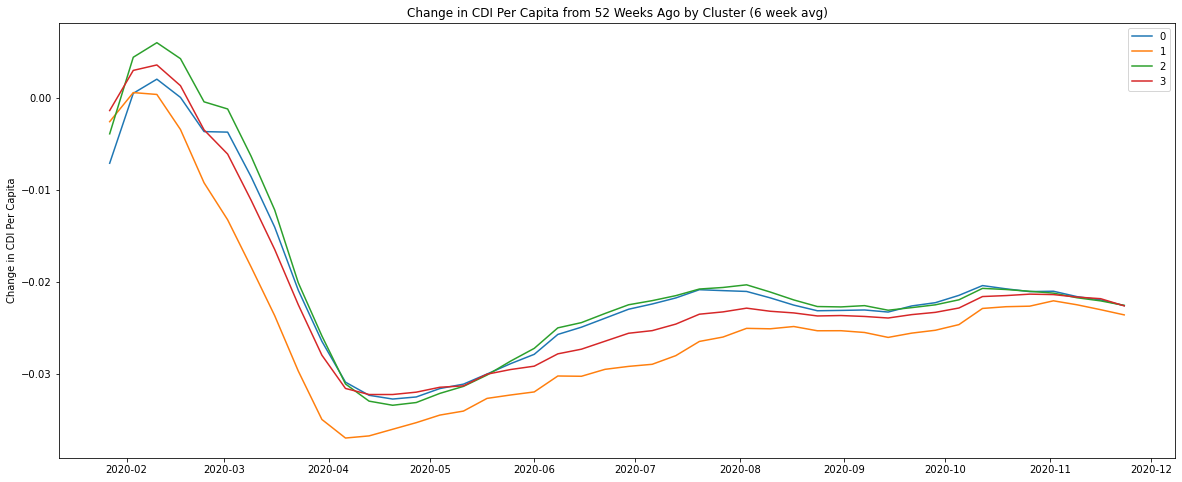

In [12]:
fig, ax = plt.subplots(figsize=(20, 8))
for key, group in cdi_cluster_diff_df.groupby(by=['cluster']):
    ax.plot(group['date_range_start'], group['cdi_per_capita'], label=key)
ax.set_title(
    'Change in CDI Per Capita from 52 Weeks Ago by Cluster (6 week avg)')
ax.set_ylabel('Change in CDI Per Capita')
ax.legend()
plt.show()

In [13]:
print(0, 1, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 0, 1))
print(0, 2, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 0, 2))
print(0, 3, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 0, 3))
print(1, 2, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 1, 2))
print(1, 3, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 1, 3))
print(2, 3, test(cdi_cluster_diff_df, 'cdi_per_capita', 'cluster', 2, 3))

0 1 [0.05390344967267714, 0.0011135591469541393]
0 2 [0.7432580601657754, 0.9944453655343248]
0 3 [0.699488245308044, 0.07553961008925282]
1 2 [0.03392654043527292, 0.0004595640923957517]
1 3 [0.13305978136883542, 0.022667144682794037]
2 3 [0.49641515569528716, 0.022667144682794037]


We can reject the hypothesis that cluster 1 and 2 follow the same distribution.